In [5]:
import numpy as np
import pickle
import os
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

## See number of loci in each step

In [2]:
envs=["ynb","suloc","raff","mol","27C","eth","30C","25C","sds","cu","33C","li","gu","23C","35C","mann","37C", "4NQO"]
envs= sorted(envs)



loci after greedy with cc = 0.99: 6368 (18, 6368)
non-zero loci in F1: 2241
loci after localization round 1 with lt1 = 0.0 and norm l1: 1655 (18, 1655)
non-zero loci in F2: 491
number of loci localized in round 2 with lt2 = 0.003: 110


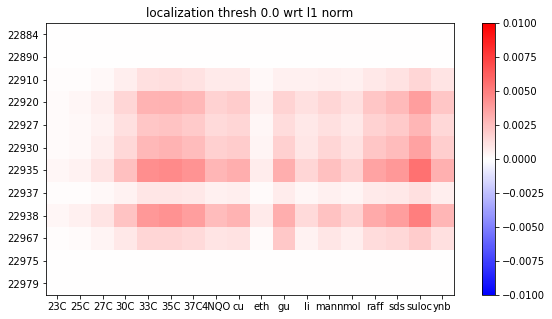



loci after greedy with cc = 0.99: 6368 (18, 6368)
non-zero loci in F1: 2241
loci after localization round 1 with lt1 = 0.001 and norm l1: 1116 (18, 1116)
non-zero loci in F2: 516
number of loci localized in round 2 with lt2 = 0.003: 134


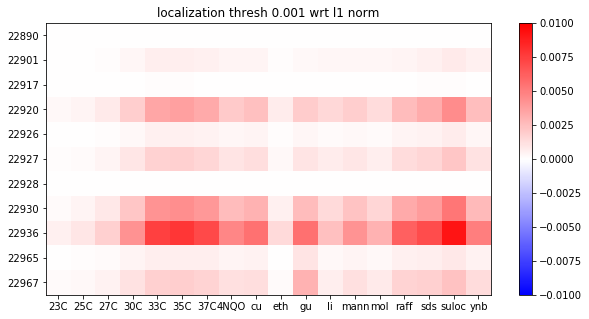



loci after greedy with cc = 0.99: 6368 (18, 6368)
non-zero loci in F1: 2241
loci after localization round 1 with lt1 = 0.001 and norm l2: 1127 (18, 1127)
non-zero loci in F2: 405
number of loci localized in round 2 with lt2 = 0.003: 116


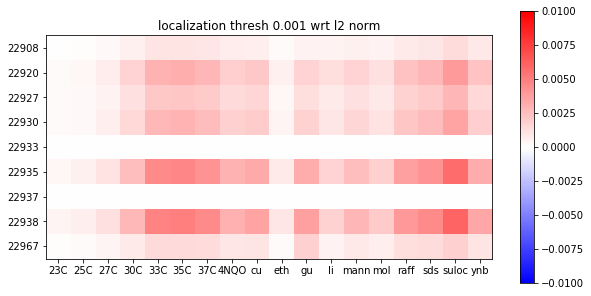



loci after greedy with cc = 0.99: 6368 (18, 6368)
non-zero loci in F1: 2241
loci after localization round 1 with lt1 = 0.0015 and norm l1: 908 (18, 908)
non-zero loci in F2: 391
number of loci localized in round 2 with lt2 = 0.003: 102


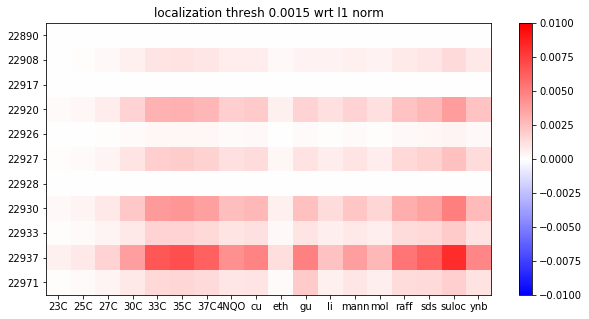



loci after greedy with cc = 0.99: 6368 (18, 6368)
non-zero loci in F1: 2241
loci after localization round 1 with lt1 = 0.0015 and norm l2: 1088 (18, 1088)
non-zero loci in F2: 408
number of loci localized in round 2 with lt2 = 0.003: 114


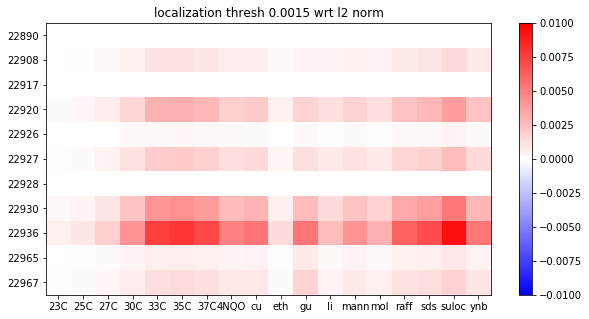



loci after greedy with cc = 0.99: 6368 (18, 6368)
non-zero loci in F1: 2241
loci after localization round 1 with lt1 = 0.002 and norm l1: 757 (18, 757)
non-zero loci in F2: 392
number of loci localized in round 2 with lt2 = 0.003: 145


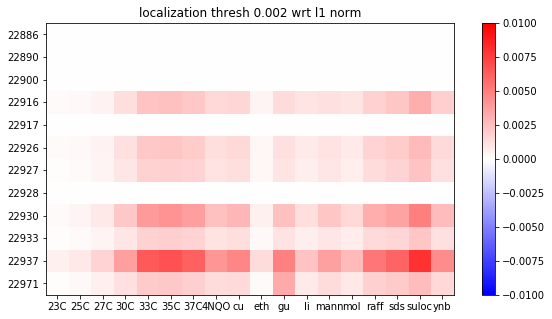



loci after greedy with cc = 0.99: 6368 (18, 6368)
non-zero loci in F1: 2241
loci after localization round 1 with lt1 = 0.002 and norm l2: 1045 (18, 1045)
non-zero loci in F2: 481
number of loci localized in round 2 with lt2 = 0.003: 128


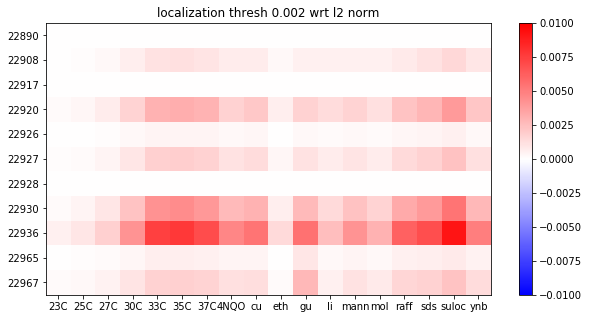



loci after greedy with cc = 0.99: 6368 (18, 6368)
non-zero loci in F1: 2241
loci after localization round 1 with lt1 = 0.003 and norm l1: 453 (18, 453)
non-zero loci in F2: 363
number of loci localized in round 2 with lt2 = 0.003: 203


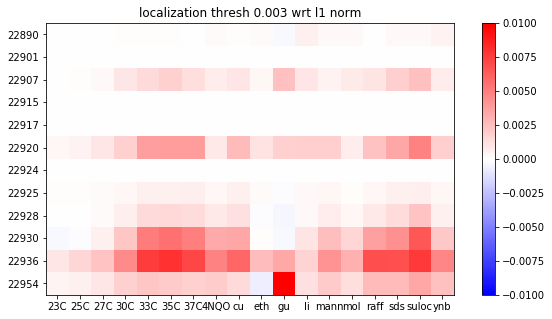



loci after greedy with cc = 0.99: 6368 (18, 6368)
non-zero loci in F1: 2241
loci after localization round 1 with lt1 = 0.003 and norm l2: 785 (18, 785)
non-zero loci in F2: 324
number of loci localized in round 2 with lt2 = 0.003: 106


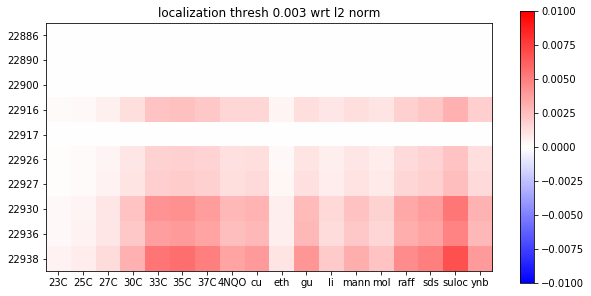

In [9]:
results_dir = "BBQ_results_6_17"
cc= "0.99"
lt2 = "0.003"
width = "50"
std = "2"
#for pair in [("l1", "0.05"), ("l2","0.05")]:#for pair in [("l1", "0.001"),("l1", "0.0015"),("l2", "0.001"), ("l2", "0.0015")]:
#for pair in [("l1", "0.0015"), ("l2", "0.0015")]:
for pair in [("l1", "0.0"),("l1", "0.001"),("l2", "0.001"),("l1", "0.0015"),("l2", "0.0015"),("l1", "0.002"),("l2", "0.002"),("l1", "0.003"),("l2", "0.003")]:
    norm, lt1  = pair[0],pair[1]
    print("\n")
    F1 = np.load(f"{results_dir}/first_F_cc_{cc}.npy")
    F2 = np.load(f"{results_dir}/second_F_cc_{cc}_lt1_{lt1}_width_{width}_std_{std}_norm_{norm}.npy")
    L1 = np.load(f"{results_dir}/loci_kept_cc_{cc}.npy")
    L2 = np.load(f"{results_dir}/loci_kept_after_localization_round_1_cc_{cc}_lt1_{lt1}_width_{width}_std_{std}_norm_{norm}.npy")
    path_to_ci = f"{results_dir}/CI_after_localization_round_2_cc_{cc}_lt1_{lt1}_lt2_{lt2}_width_{width}_std_{std}_norm_{norm}.pickle"
    final_loci, final_loci_lists = pickle.load(open(path_to_ci,"rb"))
    print(f"loci after greedy with cc = {cc}:" ,sum(L1), F1.shape)
    print("non-zero loci in F1:", sum(np.sum(np.abs(F1), axis = 0)>0))
    print(f"loci after localization round 1 with lt1 = {lt1} and norm {norm}:", sum(L2),  F2.shape)#sum(L2),
    print("non-zero loci in F2:", sum(np.sum(np.abs(F2), axis = 0)>0))
    print(f"number of loci localized in round 2 with lt2 = {0.003}:", len(final_loci))
    
    restrict_to = []
    lnames = []
    fidx = 0
    for _ in range(L2.shape[0]):
        if L2[_]:
            if np.abs(_-22933) <50:
                restrict_to.append(fidx)
                lnames.append(_)
            fidx +=1
    fig, ax = plt.subplots(figsize = (10,5))
    z = ax.imshow(F2[:,restrict_to].T, vmin = -.01, vmax = .01, cmap = 'bwr')
    ax.set_yticks(range(len(restrict_to)))
    ax.set_yticklabels(lnames)
    ax.set_xticks(range(len(envs)))
    ax.set_xticklabels(envs)
    ax.set_title(f"localization thresh {lt1} wrt {norm} norm")
    fig.colorbar(z)
    plt.show()
   # except:
    #    print("not done yet")

2.4424906541753444e-15


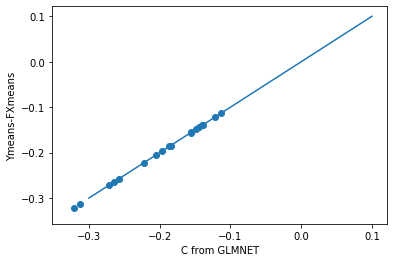

23C 0.5893334414487232


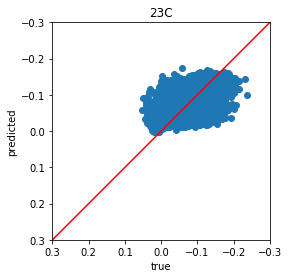

25C 0.5977378294988246


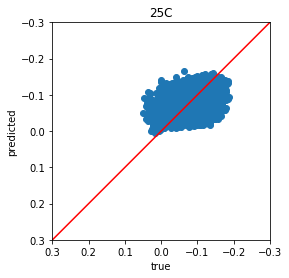

27C 0.5947002560949868


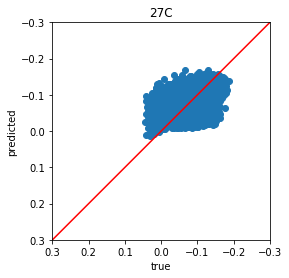

30C 0.5916322576156978


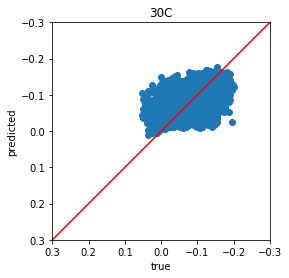

33C 0.6021800064466541


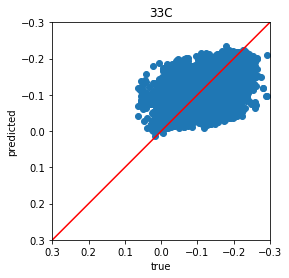

35C 0.5227449135895161


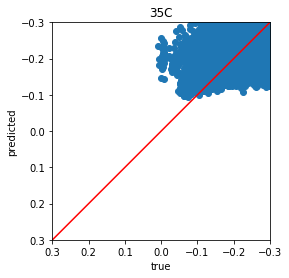

37C 0.518978823822731


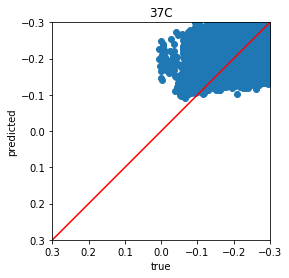

4NQO 0.5329454196678772


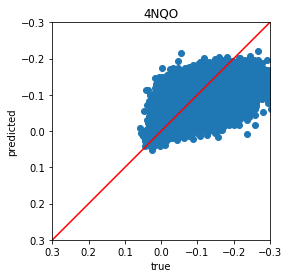

cu 0.5712086805139462


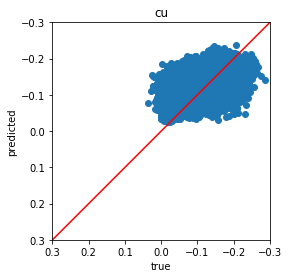

eth 0.5719626811252527


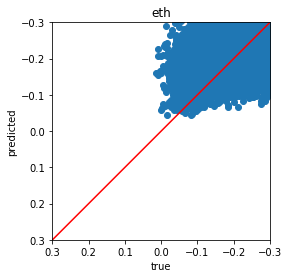

gu 0.5239037512174317


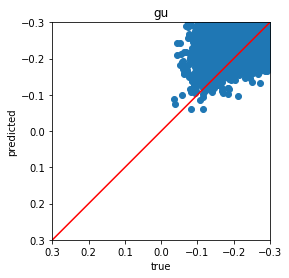

li 0.5798320954165858


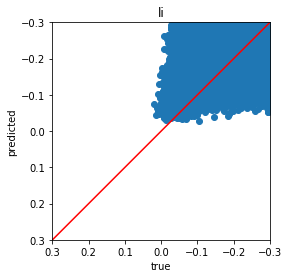

mann 0.5327916390911908


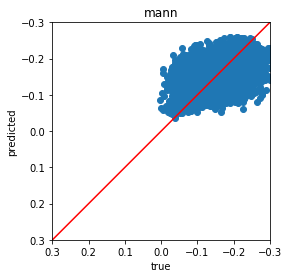

mol 0.5466969191285391


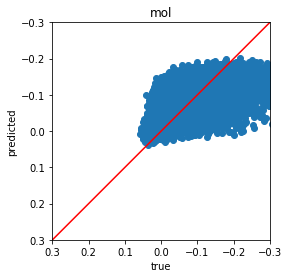

raff 0.6050574459626754


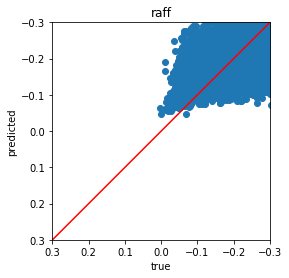

sds 0.5930685375846763


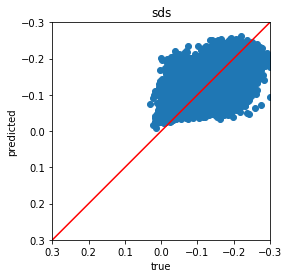

suloc 0.5823213704464242


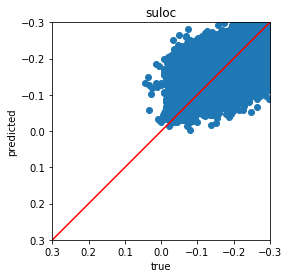

ynb 0.45013617444403964


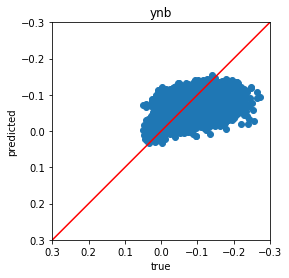

In [6]:
inloc = "../QTL/BBQ_data_processed"

causal_loci = np.where(L1==True)[0]
Xtrain = np.load(f"{inloc}/geno_train.npy") [:,causal_loci] 
Ytrain = np.load(f"{inloc}/pheno_train.npy") 
Xval = np.load(f"{inloc}/geno_val.npy")[:,causal_loci] 
Yval = np.load(f"{inloc}/pheno_val.npy")

loaded_preds =  np.load(f"{results_dir}/first_preds_cc_{cc}.npy")
computed_preds = Xtrain @ F1.T
C = (loaded_preds-computed_preds)[0,...]
computed_preds_w_C = Xtrain @ F1.T  + C
print(np.max(np.abs(computed_preds_w_C- loaded_preds)))

Ymeans = np.mean(Ytrain, axis = 0)
FXmeans =  np.mean(Xtrain @ F1.T, axis =0)
plt.scatter(C, Ymeans-FXmeans)
plt.plot([-.3,.1],[-.3,.1])
plt.xlabel("C from GLMNET")
plt.ylabel("Ymeans-FXmeans")
plt.show()

z = -.3
for _, env in enumerate(envs):
    print(env, r2_score(Ytrain[:,_], computed_preds_w_C[:,_]))
    plt.scatter(Ytrain[:,_], computed_preds_w_C[:,_])
    plt.title(env)
    plt.axis("scaled")
    plt.xlim(-z,z)
    plt.ylim(-z,z)
    plt.plot([-z,z],[-z,z], c = 'red')
    plt.xlabel("true")
    plt.ylabel("predicted")
    plt.show()

In [11]:
causal_loci

array([  115,   207,   216,   228,   263,   265,   279,   314,   955,
        1041,  1054,  1401,  1429,  1477,  1868,  2461,  2502,  2544,
        2564,  2624,  2961,  2964,  2980,  2998,  3002,  3007,  3034,
        3383,  3403,  3430,  3434,  3451,  3460,  3462,  3477,  3500,
        3536,  4286,  4314,  4337,  4496,  4515,  4584,  4931,  4937,
        4951,  4953,  4971,  4974,  4979,  5023,  5033,  5058,  5065,
        5074,  5083,  5130,  5264,  5265,  5267,  5271,  5307,  5311,
        5314,  5315,  5322,  5333,  5350,  5360,  5364,  5743,  5817,
        6139,  6157,  6229,  6246,  6455,  6489,  6794,  6827,  6828,
        6847,  6858,  6859,  6875,  6878,  6909,  6949,  7000,  7026,
        7047,  7065,  7066,  7069,  7085,  7087,  7094,  7096,  7100,
        7115,  7117,  7120,  7123,  7129,  7138,  7144,  7147,  7159,
        7165,  7172,  7179,  7180,  7193,  7195,  7205,  7256,  7277,
        7301,  7305,  7336,  7346,  7349,  7355,  7381,  7393,  7395,
        7406,  7445,

In [19]:
inloc = "../QTL/BBQ_data_processed"

results_dir = "BBQ_results_6_17"
cc= "0.99"
lt2 = "0.003"
width = "50"
std = "2"
pair = ("l1", "0.004")
norm, lt1  = pair[0],pair[1]
print("\n")
F2 = np.load(f"{results_dir}/second_F_cc_{cc}_lt1_{lt1}_width_{width}_std_{std}_norm_{norm}.npy")
L2 = np.load(f"{results_dir}/loci_kept_after_localization_round_1_cc_{cc}_lt1_{lt1}_width_{width}_std_{std}_norm_{norm}.npy")
loaded_preds =  np.load(f"{results_dir}/second_preds_cc_{cc}_lt1_{lt1}_width_{width}_std_{std}_norm_{norm}.npy")

Xtrain = np.load(f"{inloc}/geno_train.npy")[:,L2] 
Ytrain = np.load(f"{inloc}/pheno_train.npy") 


for _, env in enumerate(envs):
    print(env, r2_score(Ytrain[:,_], loaded_preds[:,_]))
    



23C -4.200169786660809
25C -4.614721712114784
27C -4.591418482709257
30C -4.565682394986113
33C -5.011850200498849
35C -14.961199556994918
37C -15.396498573465255
4NQO -2.287025079432794
cu -8.807616712799609
eth -10.02453079048128
gu -12.292435636993922
li -3.769370467103472
mann -12.336994597768344
mol -1.6165673904368791
raff -10.531859710291467
sds -7.419257590294533
suloc -8.639851393673052
ynb -2.5950561870404902


## Look up ORFs

In [6]:
results_dir = "BBQ_results_6_15"
cc= "0.99"
lt1 ="0.0"
lt2 = "0.003"
width = "50"
std = "2"
F1 = np.load(f"{results_dir}/first_F_cc_{cc}.npy")
F2 = np.load(f"{results_dir}/second_F_cc_{cc}_lt1_{lt1}_width_{width}_std_{std}.npy")
L1 = np.load(f"{results_dir}/loci_kept_cc_{cc}.npy")
L2 = np.load(f"{results_dir}/loci_kept_after_localization_round_1_cc_{cc}_lt1_{lt1}_width_{width}_std_{std}.npy")
path_to_ci = f"{results_dir}/CI_after_localization_round_2_cc_{cc}_lt2_{lt2}_width_{width}_std_{std}.pickle"
final_loci, final_loci_lists = pickle.load(open(f"{results_dir}/CI_after_localization_round_2_cc_{cc}_lt2_{lt2}_width_{width}_std_{std}.pickle","rb"))
print(f"loci after greedy with cc = {cc}:" ,sum(L1), F1.shape)
print("non-zero loci in F1:", sum(np.sum(np.abs(F1), axis = 0)>0))
print(f"loci after localization round 1 with lt1 = {lt1}:", sum(L2), F2.shape)
print("non-zero loci in F2:", sum(np.sum(np.abs(F2), axis = 0)>0))
print(f"number of loci localized in round 2 with lt2 = {0.003}:", len(final_loci))

loci after greedy with cc = 0.99: 6368 (18, 6368)
non-zero loci in F1: 2241
loci after localization round 1 with lt1 = 0.0: 1655 (18, 1655)
non-zero loci in F2: 491
number of loci localized in round 2 with lt2 = 0.003: 110


In [7]:
new_dir = path_to_ci[:-7]+"_orf_and_anno"
print(new_dir)
try:
    os.mkdir(new_dir)
except:
    print(f"already have directory {new_dir}")

BBQ_results_6_15/CI_after_localization_round_2_cc_0.99_lt2_0.003_width_50_std_2_orf_and_anno
already have directory BBQ_results_6_15/CI_after_localization_round_2_cc_0.99_lt2_0.003_width_50_std_2_orf_and_anno


In [ ]:
#download and put in repo
for i,li in enumerate(final_loci_lists):
    z = " ".join([str(_) for _ in li])
    ! python /n/desai_lab/users/efenton/bbq/yeast_info/get_orf.py {z} > {new_dir}/orf_out_{i}.txt

^C
Traceback (most recent call last):
  File "/n/desai_lab/users/efenton/bbq/yeast_info/get_orf.py", line 1, in <module>
    import numpy as np
  File "/n/home01/spetti/.conda/envs/jupyter_3.6/lib/python3.6/site-packages/numpy/__init__.py", line 142, in <module>
    from . import core
  File "/n/home01/spetti/.conda/envs/jupyter_3.6/lib/python3.6/site-packages/numpy/core/__init__.py", line 24, in <module>
    from . import multiarray
  File "/n/home01/spetti/.conda/envs/jupyter_3.6/lib/python3.6/site-packages/numpy/core/multiarray.py", line 14, in <module>
    from . import overrides
  File "/n/home01/spetti/.conda/envs/jupyter_3.6/lib/python3.6/site-packages/numpy/core/overrides.py", line 9, in <module>
    from numpy.compat._inspect import getargspec
  File "/n/home01/spetti/.conda/envs/jupyter_3.6/lib/python3.6/site-packages/numpy/compat/__init__.py", line 14, in <module>
    from . import py3k
  File "/n/home01/spetti/.conda/envs/jupyter_3.6/lib/python3.6/site-packages/numpy/compat

In [ ]:
all_loci = [i for j in final_loci_lists for i in j]
loci_to_orf_d = dict.fromkeys(all_loci)
for i,li in enumerate(final_loci_lists):
    orf_file = f"{new_dir}/orf_out_{i}.txt"
    print(orf_file)
    fh = open(orf_file, 'r')
    success_loci= []
    orfs = []
    loci_time = False
    orf_time = False
    for line in fh.readlines():
        if loci_time:
            new_loci = line.split()
            if new_loci[0]=='[]':
                print("none annotated")
                break
            #print(new_loci)
            if new_loci[0][0]=='[':
                if new_loci[0]=='[':
                    new_loci = new_loci[1:]
                else:
                    new_loci[0] = new_loci[0][1:]
            if new_loci[-1][-1]==']':
                new_loci[-1] = new_loci[-1][:-1]
                loci_time = False
            #print(new_loci)
            success_loci += [int(_) for _ in new_loci]
        if orf_time:
            orfs = [x[7:-1] for x in line.split(',')[:-1]] + [line.split(',')[-1][7:-3]]
        if line.startswith("Named"):
            loci_time = True
        if line.startswith("Gene"):
            orf_time = True
    if len(orfs)!= len(success_loci):
        raise ValueError("different number of ORFs and loci...something went wrong")
    fh.close()
    #print(orfs, success_loci)
    for _, loci in enumerate(success_loci):
       # print(loci, orfs[_])
        loci_to_orf_d[loci] = orfs[_] 

In [ ]:
loci_to_possible_orfs_d = {}
all_possible_orfs = []
all_orfs = []
for i in range(len(final_loci)):
    F_idx, X_idx = final_loci[i]
    loci_list = final_loci_lists[i]
    print(F_idx, X_idx, loci_list)
    possible_orfs = set([loci_to_orf_d[_] for _ in loci_list])
    possible_orfs = [ _ for _ in possible_orfs if _ is not ""]
    all_possible_orfs.append(possible_orfs)
    all_orfs+=possible_orfs
    print(possible_orfs)
    loci_to_possible_orfs_d[X_idx]= possible_orfs
print(loci_to_possible_orfs_d)

In [ ]:
plt.scatter(range(len(final_loci)), [len(_) for _ in all_possible_orfs], alpha= .5)

Text(0.5, 0, 'number of ORFs')

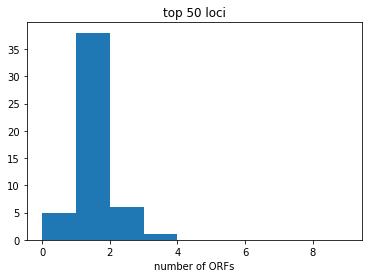

In [15]:
plt.hist([len(_) for _ in all_possible_orfs[:50]], bins = np.arange(0,10,1))
plt.title("top 50 loci")
plt.xlabel("number of ORFs")

Text(0.5, 0, 'number of ORFs')

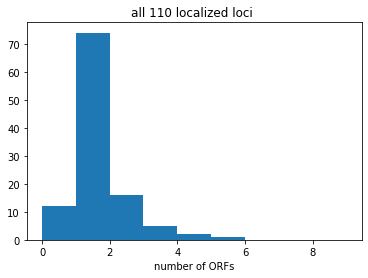

In [16]:
plt.hist([len(_) for _ in all_possible_orfs], bins = np.arange(0,10,1))
plt.title(f"all {len(all_possible_orfs)} localized loci ")
plt.xlabel("number of ORFs")

## Get annotations and save in data frame

In [17]:
fh = open(f"{new_dir}/orf_names.txt", "w")
fh.write(" ".join(all_orfs))
fh.close()

pickle.dump(loci_to_possible_orfs_d, open(f"{new_dir}/loci_to_possible_orfs_d", "wb"))
#loci_to_possible_orfs_d = pickle.load(open(f"{new_dir}/loci_to_possible_orfs_d", "rb"))

In [18]:
# upload file for process and function annotations here: https://www.yeastgenome.org/goSlimMapper
# save tab delinated results to 
fun_anno = f"{new_dir}/go_annotations_function.txt"
proc_anno = f"{new_dir}/go_annotations_process.txt"



In [21]:
# use https://yeastmine.yeastgenome.org/yeastmine/begin.do to get annotations for orf_names.txt 
# ignored ones with ambigous labels
# make columns: 'Systematic Gene Name', 1:'Standard Gene Name',2:'Long Gene Name',3:'Brief Description',4:'Description', 5:'Function Summary'
# save tab delinated results to 
gene_anno = f"{new_dir}/gene_anno.tsv"


In [22]:
all_orfs = []
for key in loci_to_possible_orfs_d:
    all_orfs += loci_to_possible_orfs_d[key]
print(len(all_orfs))
all_orfs = list(set(all_orfs))
print(len(all_orfs))

df = pd.read_csv(gene_anno, sep = '\t', header=None)#, cols = ["name1", "name2", "func","description"])
df = df.set_index(0)
df.rename(columns = {0:'Systematic Gene Name', 1:'Standard Gene Name',2:'Long Gene Name',3:'Brief Description',4:'Description', 5:'Function Summary'}, inplace = True)


for orf in all_orfs:
    if orf not in df.index:
        df.loc[orf] = [None, None, None, None, None]

cl_description_proc = dict.fromkeys(df.index)
for key in cl_description_proc:
    cl_description_proc[key] = []
fh = open(proc_anno, 'r')
fh.readline()
for line in fh.readlines():
    ll = line.split('\t')
    name = f"{ll[1]} ({ll[2]})"
    li = ll[-1].strip().split(', ')
    for _ in li:
        if _=="SNR30": _ = "snR30"
        if _=="TP(UGG)O3": _ = "tP(UGG)O3"
        cl_description_proc[_].append(name)
for _ in cl_description_proc.keys():
    cl_description_proc[_] = " ".join(cl_description_proc[_])


cl_description_func = dict.fromkeys(df.index)
for key in cl_description_func:
    cl_description_func[key] = []
fh = open(fun_anno, 'r')
fh.readline()
for line in fh.readlines():
    ll = line.split('\t')
    name = f"{ll[1]} ({ll[2]})"
    li = ll[-1].strip().split(', ')
    for _ in li:
        if _=="SNR30": _ = "snR30"
        if _=="TP(UGG)O3": _ = "tP(UGG)O3"
        cl_description_func[_].append(name)
for _ in cl_description_func.keys():
    cl_description_func[_] = " ".join(cl_description_func[_])


df["GO_Function"] = [cl_description_func[_] for _ in df.index]
df["GO_Process"] = [cl_description_proc[_] for _ in df.index]

df

df.to_csv(f'{new_dir}/orf_info.csv')

134
116


In [23]:
df

,Standard Gene Name,Long Gene Name,Brief Description,Description,Function Summary,GO_Function,GO_Process
0,,,,,,,
YAL051W,OAF1,Oleate-Activated transcription Factor,Oleate-activated transcription factor,Oleate-activated transcription factor; subunit...,NaN,DNA binding (12) DNA-binding transcription fac...,transcription by RNA polymerase II (15) respon...
YAL056W,GPB2,NaN,Multistep regulator of cAMP-PKA signaling,Multistep regulator of cAMP-PKA signaling; inh...,NaN,enzyme regulator activity (7),transcription by RNA polymerase II (15) respon...
YBR111C,YSA1,NaN,Nudix hydrolase family member with ADP-ribose ...,Nudix hydrolase family member with ADP-ribose ...,NaN,hydrolase activity (5),
YBR150C,TBS1,ThiaBendazole Sensitive,Protein of unknown function,"Protein of unknown function; the authentic, no...",NaN,DNA binding (12),
YCR006C,NaN,NaN,Putative protein of unknown function,Putative protein of unknown function; conserve...,NaN,,
...,...,...,...,...,...,...,...
YLRWdelta15,None,None,None,None,None,,
YLRWsigma3,None,None,None,None,None,,
ARS439,None,None,None,None,None,,
